<a href="https://colab.research.google.com/github/ucheokechukwu/zero_to_mastery_courses/blob/main/Pytorch_For_Deep_Learning/04_Pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

https://www.learnpytorch.io/04_pytorch_custom_datasets/

https://github.com/mrdbourke/pytorch-deep-learning/tree/main

- getting custom datasets
- transforming data
- exploratory data analysis
- loading custom data with prebuilt and custom functions
- build the FoodVision Models
- compare models with./without data augmentation
- make predictions

# import libraries and set up device-agnostic code

In [1]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Getting the data



dataset is a subset of Food101 dataset.

Food101 has 101 different classes of food and 1000 images per class (750 training and 250 testing).

our dataset has 3 classes of food and 10% of images (~75 training and ~25 testing)



In [2]:
import requests
import zipfile
from pathlib import Path

# set up path to the data folder
data_path = Path('data')
image_path = data_path / 'pizza_steak_sushi'

# if the image folder doesn't exist, download it and prepare it...

if image_path.is_dir():
    print(f'{image_path} directory already exists... skipping download....')
else:
    print(f'{image_path} directory does not exist... creating... ')
    image_path.mkdir(parents=True, exist_ok=True)

data/pizza_steak_sushi directory already exists... skipping download....


In [3]:
# download pizza, steak and sushi data from github
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading pizza, steak, sushi data...')
    f.write(request.content)

# unzip data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('unzipping pizza, steak, sushi data')
    zip_ref.extractall(image_path)


unzipping pizza, steak, sushi data


# Exploring and preparing the data

In [4]:
import os
def walk_through_dir(dir_path):
    """walks through the dir_path returning its contents"""
    for dirpath, dirname, filenames in os.walk(dir_path):
        print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

In [5]:
next(os.walk('sample_data'))

('sample_data',
 [],
 ['anscombe.json',
  'README.md',
  'california_housing_test.csv',
  'mnist_train_small.csv',
  'mnist_test.csv',
  'california_housing_train.csv'])

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


* this is the standard image classification directory structure. put the images of the same class inside on directory named with the class name

* this is based on https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

In [7]:
# set up training and testing path
train_dir = image_path /'train'
test_dir = image_path /'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Visualizing the images

1. get all the image paths
2. pick a random image path using `random.choice()`
3. get an image class name using `pathlib.Path.parent.stem`
4. open the image with Python Pillow (PIL)
5. show the image and print metadata

### visualizing with `PIL.Image()`

In [8]:
image_path, type((image_path.glob("")))

(PosixPath('data/pizza_steak_sushi'), generator)

In [9]:
import random
from PIL import Image

# 1. get all the image paths note the format passed to glob
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list


[PosixPath('data/pizza_steak_sushi/test/sushi/988559.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/46797.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2385731.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3177743.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/207578.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3806282.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2540511.jpg'),
 PosixPath('data/pizza_steak_su

Random image path: data/pizza_steak_sushi/train/pizza/2228322.jpg
Image class: pizza
Image height: 512
Image width: 512


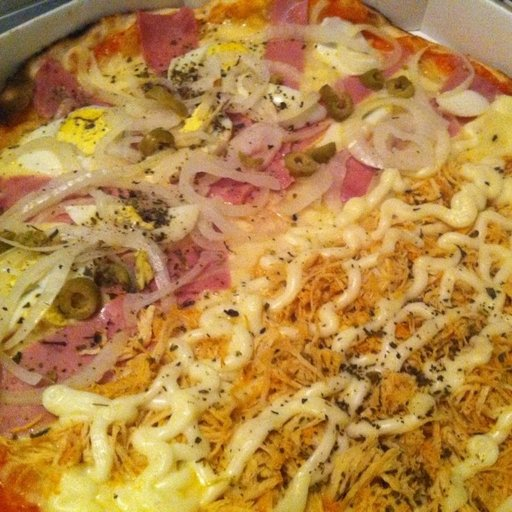

In [10]:
# 2. pick a random image path
# set seed
# random.seed(42)
random_image_path = random.choice(image_path_list)

# 3. get the image clas
image_class = random_image_path.parent.stem

# 4. open the image with PIL
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
display(img)

### visualizing with matplotlib

(-0.5, 511.5, 511.5, -0.5)

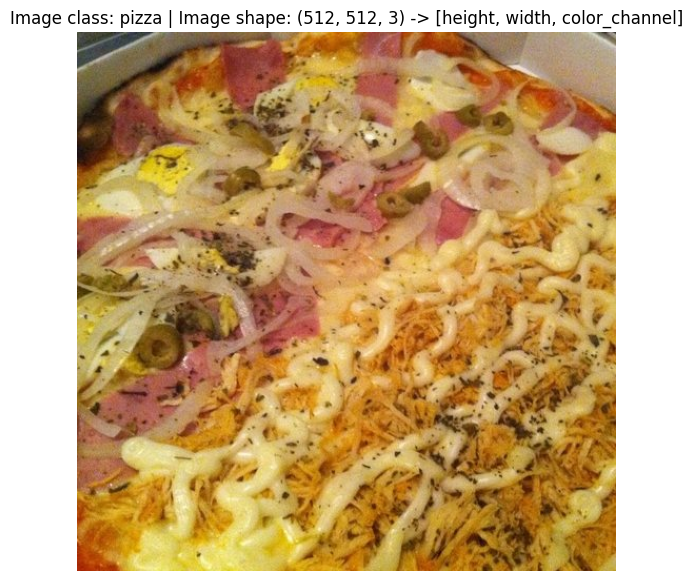

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# turn the image into an array
img_as_array = np.asarray(img)
# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channel]')
plt.axis(False)

In [12]:
img.size, img_as_array

((512, 512),
 array([[[ 90,  95,  73],
         [ 76,  81,  61],
         [ 70,  74,  57],
         ...,
         [105, 100,  94],
         [ 72,  69,  62],
         [ 54,  51,  44]],
 
        [[ 73,  78,  58],
         [ 73,  78,  58],
         [ 78,  82,  67],
         ...,
         [157, 153, 144],
         [133, 129, 120],
         [ 93,  90,  81]],
 
        [[ 69,  73,  56],
         [ 75,  79,  62],
         [ 83,  87,  73],
         ...,
         [165, 161, 150],
         [161, 157, 145],
         [149, 145, 133]],
 
        ...,
 
        [[173,  44,  12],
         [170,  41,   9],
         [167,  39,   4],
         ...,
         [195, 168,  63],
         [199, 172,  67],
         [204, 177,  72]],
 
        [[173,  43,  11],
         [173,  43,  11],
         [170,  40,   8],
         ...,
         [194, 166,  57],
         [195, 167,  58],
         [198, 170,  60]],
 
        [[169,  39,   7],
         [173,  43,  11],
         [174,  44,  12],
         ...,
         [188, 

## Transforming data with `torchvision.transforms`

Before we can use our image data with Pytorch:
1. turn target data into tensors
2. turn into a `torch.utils.data.Dataset`
3. turn into a `torch.utils.data.DataLoader`

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [14]:
# write a transform for image
data_transform = transforms.Compose( # or nn.Sequential()
    [
        # resize our images to 64x64
        transforms.Resize(size=(64,64)),
        # flip the images randomly on horizontal (adding diversity to th edata)
        transforms.RandomHorizontalFlip(p=0.5),
        # turn the image into a torch tensor
        transforms.ToTensor(),
    ]
)

In [15]:
data_transform(img), data_transform(img).shape, data_transform(img).dtype

(tensor([[[0.5255, 0.5765, 0.7255,  ..., 0.2627, 0.2627, 0.2824],
          [0.7020, 0.7333, 0.7137,  ..., 0.2980, 0.2980, 0.2902],
          [0.7255, 0.7098, 0.7059,  ..., 0.3216, 0.2784, 0.3020],
          ...,
          [0.7020, 0.6863, 0.6078,  ..., 0.7373, 0.7216, 0.6980],
          [0.7412, 0.7059, 0.6588,  ..., 0.7255, 0.7176, 0.6902],
          [0.7647, 0.7333, 0.6510,  ..., 0.7098, 0.7059, 0.6667]],
 
         [[0.4941, 0.5608, 0.7098,  ..., 0.2784, 0.2706, 0.2941],
          [0.6706, 0.7020, 0.6627,  ..., 0.3176, 0.3216, 0.3098],
          [0.6745, 0.6549, 0.6392,  ..., 0.3255, 0.3137, 0.3373],
          ...,
          [0.4627, 0.4588, 0.4000,  ..., 0.3882, 0.3255, 0.2627],
          [0.5882, 0.5098, 0.4510,  ..., 0.3176, 0.2784, 0.2235],
          [0.6667, 0.5922, 0.4588,  ..., 0.2549, 0.2353, 0.1765]],
 
         [[0.4314, 0.5020, 0.6314,  ..., 0.2235, 0.2235, 0.2627],
          [0.6000, 0.6353, 0.5765,  ..., 0.3098, 0.3020, 0.2784],
          [0.5961, 0.5569, 0.5412,  ...,

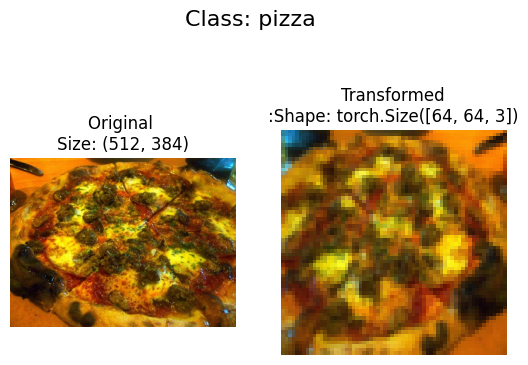

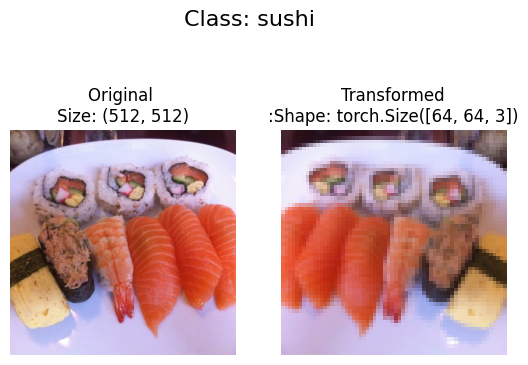

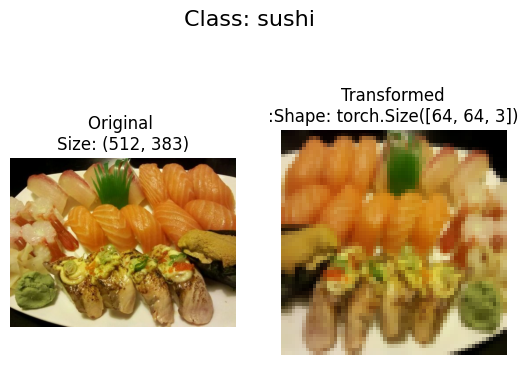

In [16]:
def plot_transformed_images(image_paths,
                            transform,
                            n=3,
                            seed=42):
    """select random images from a path of images and loads/transforms them
    then plots the original vs the transformed images"""

    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis(False)

            # transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # to put the color-channels last
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\n:Shape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

### Option 1: Loading image data using `ImageFolder`

https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

- this is a prebuilt dataset function.

In [17]:
# Use ImageFolder to create datasets

from torchvision import datasets
train_data = datasets.ImageFolder(
    root = train_dir,
    transform = data_transform, # a transform for the data
    target_transform = None # a transform for the label
)
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
## checking out the attributes of the

# get class names as a list
class_names = train_data.classes
print(f"Class names as a list: {class_names}")
# get class names as a dict
class_dict = train_data.class_to_idx
print(f"Class names as a dictionary: {class_dict}")
# check the lengths of our dataset
print(f"Length of train data: {len(train_data)}. \tLength of test data: {len(test_data)}")

train_data.samples[0]


Class names as a list: ['pizza', 'steak', 'sushi']
Class names as a dictionary: {'pizza': 0, 'steak': 1, 'sushi': 2}
Length of train data: 225. 	Length of test data: 75


('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [19]:
train_data[224]

(tensor([[[0.0078, 0.0039, 0.0039,  ..., 0.2314, 0.2824, 0.2941],
          [0.0235, 0.0196, 0.0196,  ..., 0.2549, 0.3020, 0.3490],
          [0.0392, 0.0353, 0.0392,  ..., 0.6196, 0.7451, 0.8353],
          ...,
          [0.8549, 0.8588, 0.8588,  ..., 0.0980, 0.0941, 0.0941],
          [0.8588, 0.8588, 0.8588,  ..., 0.0941, 0.0941, 0.0941],
          [0.8471, 0.8549, 0.8549,  ..., 0.0980, 0.0941, 0.0980]],
 
         [[0.0275, 0.0235, 0.0235,  ..., 0.1882, 0.2314, 0.2431],
          [0.0392, 0.0353, 0.0353,  ..., 0.2118, 0.2588, 0.3137],
          [0.0471, 0.0471, 0.0471,  ..., 0.6039, 0.7451, 0.8431],
          ...,
          [0.8314, 0.8275, 0.8275,  ..., 0.0980, 0.0941, 0.0941],
          [0.8275, 0.8275, 0.8275,  ..., 0.0941, 0.0941, 0.0941],
          [0.8157, 0.8196, 0.8235,  ..., 0.0980, 0.0941, 0.0980]],
 
         [[0.0118, 0.0078, 0.0078,  ..., 0.1255, 0.1412, 0.1529],
          [0.0275, 0.0196, 0.0196,  ..., 0.1529, 0.1882, 0.2392],
          [0.0353, 0.0314, 0.0314,  ...,

#### Visualizing

In [20]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [21]:
img, label = train_data[0]
print(f"Image tensor: \n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {class_names[label]}")
print(f"Image label dataype: {type(label)}")

Image tensor: 
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color channel]


Text(0.5, 1.0, 'pizza')

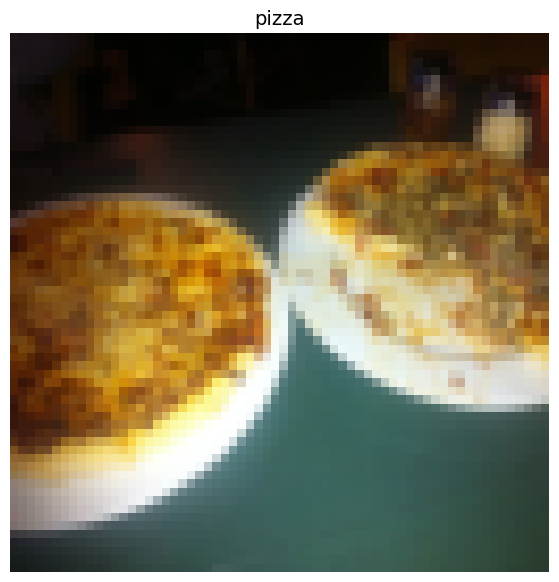

In [22]:
# rearranging hte dimensions
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"Original shape: {img.shape} -> [color channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color channel]")

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

#### Turn images into Dataloaders

A `Dataloader` will help us turn our datasets into iterables, and we can customize the batch size.

In [23]:
import os
os.cpu_count()

2

In [24]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True,
                              num_workers=os.cpu_count())

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = os.cpu_count())
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x785d322f95d0>,
 <torch.utils.data.dataloader.DataLoader at 0x785dfacf05e0>)

In [25]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [26]:
type(train_data), type(train_dataloader)

(torchvision.datasets.folder.ImageFolder,
 torch.utils.data.dataloader.DataLoader)

In [27]:
batch_sample = next(iter(train_dataloader))
batch_imgs, batch_labels = batch_sample
display(len(batch_imgs), len(batch_labels))
print(f"image shape: {batch_imgs.shape}")
print(f"label_shape: {batch_labels.shape}")

32

32

image shape: torch.Size([32, 3, 64, 64])
label_shape: torch.Size([32])


### Option 2: Loading data with custom `Dataset`

- what if the prebuilt ImageFolder did not exist?
- we need to create our own dataloading class...

Should be able to:
1. load images from file
2. get class names from the Dataset
3. get classes as a Dict

Pros:
1. can create a Dataset out of almost anything
2. not limited to the prebuilt functions

Cons:
1. it might not work
2. writing more code (with bugs)


In [28]:
import os
import pathlib
import torch
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

#### Creating a helper function to get class names

1. get the class names using `os.scandir()` to traverse a target directory  (ideally the directory is in standard image classification format).

2. raise an error if the class names aren't found

3. turn the class names into a dict and a list and return them.


In [29]:
# setup path for target directory
target_directory = train_dir
print(f"Target dir:  {target_directory}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir:  data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [30]:
directory = list(os.scandir(target_directory))[0]
type(directory)

posix.DirEntry

In [31]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Find the class folder names in a target directory
    """
    # get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    # raise error if the class names cannot be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check the file structure.")
    # create a dictionary of index labels (computers prefer numbers over strings as labels)
    classes_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, classes_to_idx
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### Create a custom `Dataset` to replicate `ImageFolder

1. subclass `torch.utils.data.Dataset`

2. init subclass with a target directory (directory we want to get data from), as well as transform (if we want to transform the data).

3. create several attributes:
    * paths - paths of our images
    * transform - the transform we want to use
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped ot integer labels

4. create a function to `load images()` - it will open an image

5. overwrite `__len__()` -  to return thelength of the dataset, which is supposed to return the size of the dataset by many `Sampler` implementations or the default option of `DataLoader`.

6. overwrite `__getitem__()`, to return a given sample when passed an index. This replicates this function: `img, label = train_data[0]`



In [32]:
# write a custom dataset
from torch.utils.data import Dataset
from pathlib import Path

# 1. subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. initialize our custom dataset
    def __init__(self, targ_dir: str, transform=None):
        # 3. create class attributes
        # get all the image paths
        self.paths = list(Path(targ_dir).glob('*/*.jpg'))
        # set up transform
        self.transform = transform
        # classes
        self.classes, self.class_to_idx = find_classes(targ_dir)
    # 4. create function to load images
    def load_images(self, index: int) -> Image.Image:
        """Opens an image via a path and returns it"""
        image_path = self.paths[index]
        return Image.open(image_path)
    # 5. overwrite the __len__() method
    def __len__(self) -> int:
        """returns the total number of samples."""
        return len(self.paths)
    # 6. overwrite the __getitem()___ method
    def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
        """returns one sample of data, data and label (X,y)"""
        img = self.load_images(index)
        class_name = self.paths[index].parent.name # expect path in the format: data_folder / class_name / image.jpg
        # class_name = self.paths[index].parts[-2] # should also work
        label = self.class_to_idx[class_name]
        # Transform if necessary
        if self.transform:
            return self.transform(img), label # return data, label (X,y)
        else:
            return img, label

In [33]:
# create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64,)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [34]:
# test our ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transforms)
test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                    transform = test_transforms)

train_data_custom, test_data_custom, train_data, test_data

(<__main__.ImageFolderCustom at 0x785d2c4d1210>,
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [35]:
len(train_data_custom), len(train_data)

(225, 225)

In [36]:
train_data_custom.classes, train_data.classes, train_data_custom.class_to_idx, train_data.class_to_idx

(['pizza', 'steak', 'sushi'],
 ['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2},
 {'pizza': 0, 'steak': 1, 'sushi': 2})

In [37]:
# check for equality between original dataset and custom dataset
train_data_custom.classes == train_data.classes, test_data_custom.classes == test_data.classes

(True, True)

In [38]:
train_data_custom[0]

(tensor([[[0.0745, 0.0039, 0.0078,  ..., 0.2196, 0.2196, 0.2235],
          [0.3608, 0.0706, 0.0392,  ..., 0.2392, 0.2353, 0.2353],
          [0.5412, 0.3020, 0.0706,  ..., 0.2588, 0.2588, 0.2510],
          ...,
          [0.2196, 0.2627, 0.3412,  ..., 0.1843, 0.1608, 0.1686],
          [0.1922, 0.2392, 0.3255,  ..., 0.1843, 0.1686, 0.1647],
          [0.1804, 0.2235, 0.2941,  ..., 0.1608, 0.1725, 0.1686]],
 
         [[0.0745, 0.0039, 0.0000,  ..., 0.0039, 0.0078, 0.0157],
          [0.3490, 0.0549, 0.0039,  ..., 0.0196, 0.0275, 0.0431],
          [0.5333, 0.2745, 0.0157,  ..., 0.0392, 0.0510, 0.0706],
          ...,
          [0.0039, 0.0078, 0.0510,  ..., 0.0157, 0.0078, 0.0196],
          [0.0039, 0.0039, 0.0392,  ..., 0.0157, 0.0118, 0.0157],
          [0.0000, 0.0039, 0.0196,  ..., 0.0157, 0.0196, 0.0196]],
 
         [[0.0667, 0.0078, 0.0039,  ..., 0.0078, 0.0039, 0.0078],
          [0.3373, 0.0549, 0.0078,  ..., 0.0078, 0.0039, 0.0078],
          [0.5137, 0.2667, 0.0196,  ...,

#### create a function to display random images

1. Take in a Dataset and a number of other parameters such as classes (the names of our target classes), the number of images to display (n) and a random seed.
2. To prevent the display getting out of hand, we'll cap n at 10 images.
3. Set the random seed for reproducible plots (if seed is set).
4. Get a list of random sample indexes (we can use Python's random.sample() for this) to plot.
5. Setup a matplotlib plot.
6. Loop through the random sample indexes found in step 4 and plot them with matplotlib.
7. Make sure the sample images are of shape HWC (height, width, color channels) so we can plot them.
8. plot adjusted samples

In [39]:
# 1. create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    # 2. adjust display if n is too high
    n = 10 if n>10 else n

    # 3. set the random seed for reproducibility
    if seed:
        random.seed(seed)

    # 4. get a list of random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. set up matplotlib
    plt.figure(figsize=(16,8))

    # 6. loop through random indexes and plot with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample]

        # 7. make sure the images are H W C (color channels last)
        targ_image = targ_image.permute(1, 2, 0)

        # 8. plot adjusted samples
        plt.subplot(1, n, i+1) # 1 row, n images
        plt.imshow(targ_image)
        plt.axis(False)
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape & (n < 10):
                title = title + f"\nshape: {targ_image.shape}"
        plt.title(title)
    plt.tight_layout()



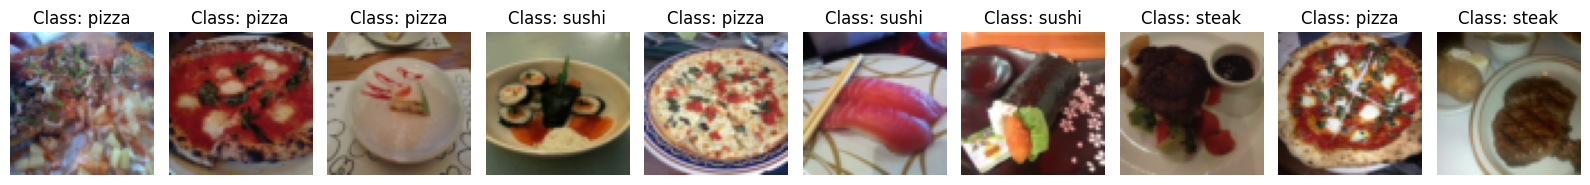

In [40]:
display_random_images(train_data, n=42, classes = class_names)

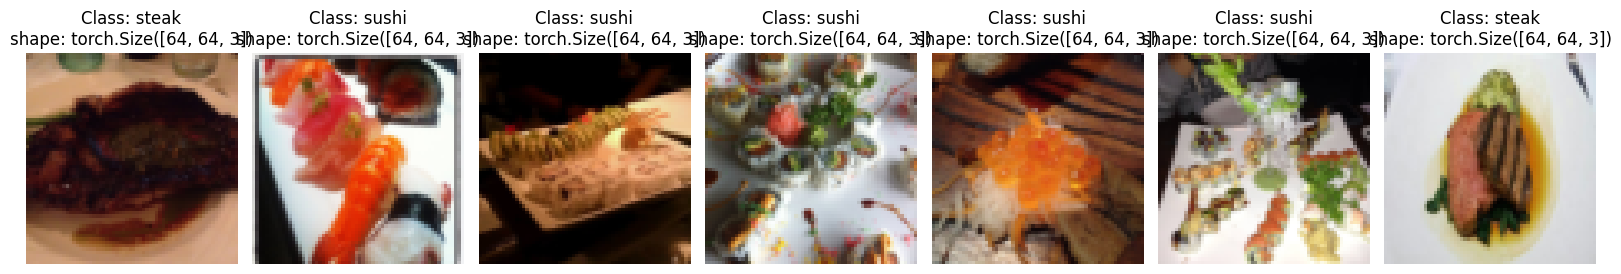

In [41]:
display_random_images(train_data_custom, n=7, classes = class_names)

#### Turn dataset into DataLoader (ie batchify)

In [42]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     shuffle=True,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count()
)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     shuffle=False,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count()
)


In [43]:
# get image and label
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape

torch.Size([32, 3, 64, 64])

#### Other forms of transforms (data augmentation)

- artificially adding diversity to training data.

In [44]:
# let;s look at trivial gument

from torchvision import transforms

train_transform = transforms.Compose(
    (transforms.Resize(size=(222,222)),
    transforms.ToTensor(),
    transforms.TrivialAugmentWide(num_magnitude_bins=31))
)

In [45]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/test/sushi/988559.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/46797.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2385731.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3177743.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/479711.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/207578.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3806282.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2540511.jpg'),
 PosixPath('data/pizza_steak_su

In [46]:
# # plot transformed images
# plot_transformed_images(
#     image_paths=image_path_list,
#     transform=train_transform,
#     n=3,
#     seed=None
# )

# Model 0 : Tiny VGG without data augmentation.

recreating the architctue from here
https://poloclub.github.io/cnn-explainer/

## Creating transforms and loading data for model 0

In [47]:
# creating a simple transform
simple_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.ToTensor()
    ]
)

In [48]:
# 1. load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(
    root = train_dir,
    transform = simple_transform,
    target_transform = None
)
test_data_simple = datasets.ImageFolder(
    root = test_dir,
    transform = simple_transform,
    target_transform = None
)

# 2. turn the datasets into DataLoaders

import os
from torch.utils.data import DataLoader

# setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create the dataloader
train_dataloader_simple = DataLoader(
    dataset = train_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset = test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS
)



## Create tinyVGG Module class

In [49]:
from torch import nn

In [50]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2) # default stride is the same as kernel size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2) # default stride is the same as kernel size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 1690,
                      out_features = output_shape),
        )


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # this alternative benefits from operation fusion
        # return self.classifier(self.conv_block2(self.conv_block1(x)))


In [51]:
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = 3,
                  )

## Try a forward pass on a single image

In [52]:
# get a single image batch

image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [53]:
y = model_0(image_batch)

In [54]:
y.shape

torch.Size([32, 3])

## Using `torchinfo` to get an idea of the shapes going through a model

In [55]:
try:
    import torchinfo
except:
    %pip install -q torchinfo
    import torchinfo

In [56]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## Training and test loops

* `train_step()` - takes a model and dataloader and trains the model on the dataloader

* `test_step()` - takes a model and dataloader and evaluates the model on the data loader

### loss function and optimizer function

In [57]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [58]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    # put the model in train mode
    model.train()
    # set up train loss and accuracy
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # send data to target device
        X, y = X.to(device), y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backwards
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # calculate accuracy metric
        y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y)

    # adjust metrics to get the average loss and accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc




def test_step (model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device = device):

    test_loss, test_acc = 0, 0
    # put model in eval mode
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):

            # send data to target device
            X, y = X.to(device), y.to(device)

            # forward pass
            y_pred_logits = model(X)

            # calculate the loss
            loss = loss_fn(y_pred_logits, y)
            test_loss += loss.item()

            # calculate the accuracy
            y_pred_class = torch.softmax(y_pred_logits, dim=1).argmax(dim=1)
            acc = (y_pred_class == y).sum().item()/len(y)
            test_acc += acc

        # get the average accuracy and loss per batch
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    return test_loss, test_acc




In [59]:
model_0.train()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [60]:
model_0.eval()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## creating a `train()` function to combine `train_step()` and `test_step()`

In [61]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

## train and evaluate model 0

In [62]:
# set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs

NUM_EPOCHS = 5

# recreate instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape = len(train_data.classes)).to(device)
# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train model 0
model_0_results = train(model_0,
                        train_dataloader_simple,
                        test_dataloader_simple,
                        optimizer,
                        loss_fn,
                        epochs=NUM_EPOCHS)

# end the timer and print out how long it took to train
end_time = timer()
print(f"Total training time: {end_time-start_time: .3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3011
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3281 | test_loss: 1.0697 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0869 | train_acc: 0.4883 | test_loss: 1.0807 | test_acc: 0.4924
Epoch: 4 | train_loss: 1.0844 | train_acc: 0.4023 | test_loss: 1.0607 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0662 | train_acc: 0.4141 | test_loss: 1.0655 | test_acc: 0.5644
Total training time:  11.522 seconds


In [63]:
train_dataloader_simple

### plot the loss curves of model 0

**loss curve** - way of tracking model's progress over time

In [64]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [65]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """plots training curves of a results dictionary"""
    # get the loss values of the results dictionary (training and test)

    loss = results['train_loss']
    test_loss = results['test_loss']


    # get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']

    test_accuracy = results['test_acc']

    # figure out how many epochs ..

    epochs = range(len(results['train_loss']))
    print(epochs)

    # set up a plot
    plt.figure(figsize=(15,7))

    # plot the lost

    plt.subplot(1, 2, 1)

    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()


    # plot the accuracy

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

range(0, 5)


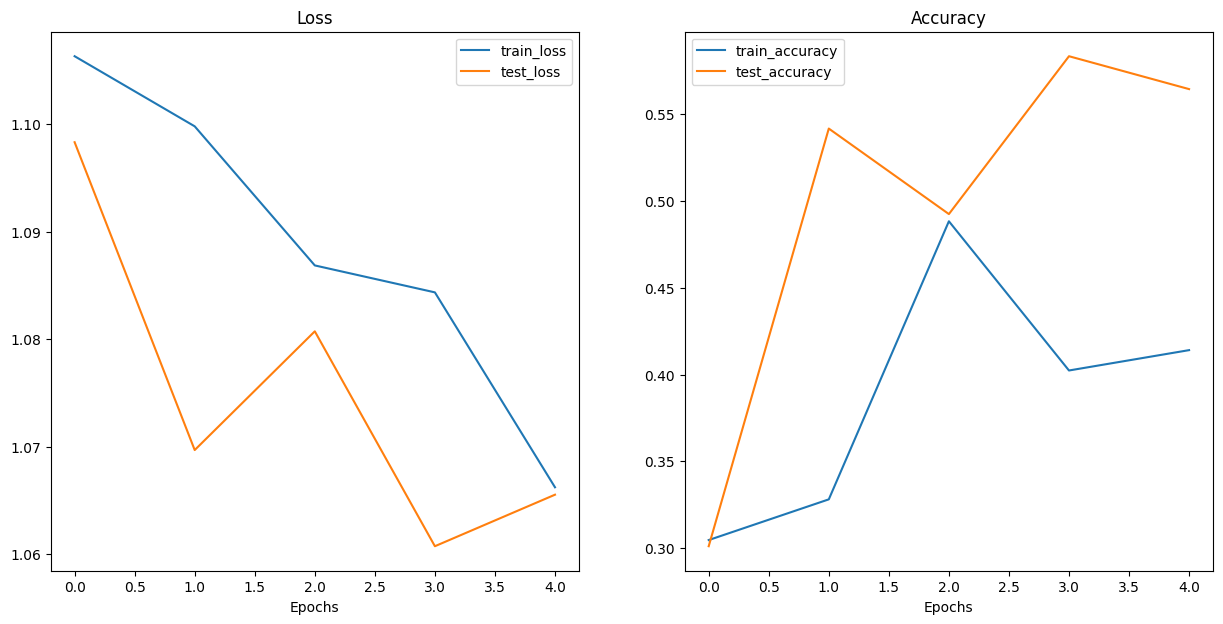

In [66]:
plot_loss_curves(model_0_results)

# Model 1 TinyVGG with data augmentation

* The same model as before but with **data augmentation**.

Note: `TrivialAugmentWide(num_magnitude_bins=31)` 31 is the upper boundary of how much augmentation to apply to the model.

In [67]:
# create training transform with TrivialAugmentat

from torchvision import transforms
train_transform_trivial = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),
        transforms.ToTensor()
    ]
)
test_transform_simple = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.ToTensor()
    ]
)

# load data using the transforms

# create train and test dataset

# turn

## Create `train` and `test` `Dataset` and `Dataloader` with data augmentation

In [68]:
# turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform_trivial
)
test_data_simple = datasets.ImageFolder(
    root=test_dir,
    transform=test_transform_simple
)

In [69]:
# turn our datasets into dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_dataloader_augmented = DataLoader(
    dataset=train_data_augmented,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

## Construct and train model 1
same as model 0 but with augmented data

In [70]:
# Create model 1 and sent to the target device
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

- create loss function and optimizer
- use `train()` function to train and evalute our models

In [71]:
# set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 5

# set up loss functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)

# start the timer
from timeit import default_timer as timer
start_time=timer()

# train model 1
model_1_results = train(model=model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,)

end_time = timer()
print(f"Total training time for model_1 is {end_time-start_time:.3f} seconds.")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1049 | train_acc: 0.2500 | test_loss: 1.1019 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0807 | train_acc: 0.4258 | test_loss: 1.1261 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0712 | train_acc: 0.4258 | test_loss: 1.1593 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1253 | train_acc: 0.3047 | test_loss: 1.1581 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0865 | train_acc: 0.4258 | test_loss: 1.1555 | test_acc: 0.3333
Total training time for model_1 is 6.672 seconds.


range(0, 5)


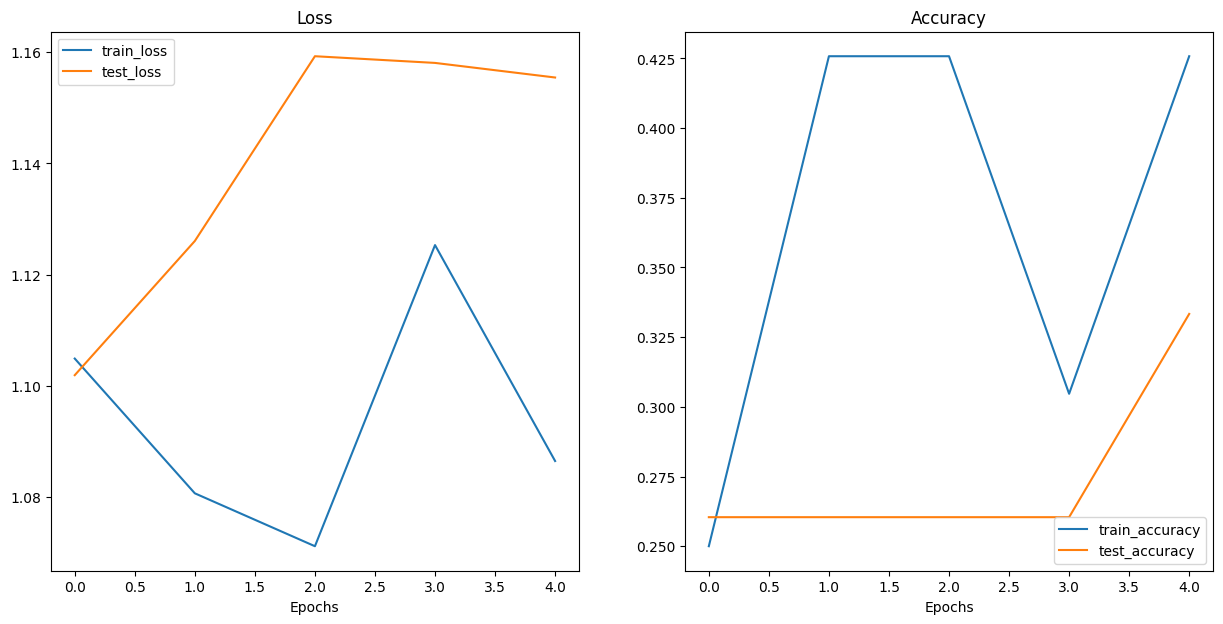

In [72]:
plot_loss_curves(model_1_results)

# Compare model results:
1. hard coding
2. pytorch and tensorboard
3. weights and biases
4. MLflow

In [73]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099798,0.328125,1.069688,0.541667
2,1.086860,0.488281,1.080731,0.492424
3,1.084354,0.402344,1.060743,0.583333
4,1.066225,0.414062,1.065535,0.564394


In [74]:
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.104914,0.250000,1.101928,0.260417
1,1.080687,0.425781,1.126056,0.260417
2,1.071174,0.425781,1.159278,0.260417
3,1.125320,0.304688,1.158074,0.260417
4,1.086494,0.425781,1.155451,0.333333


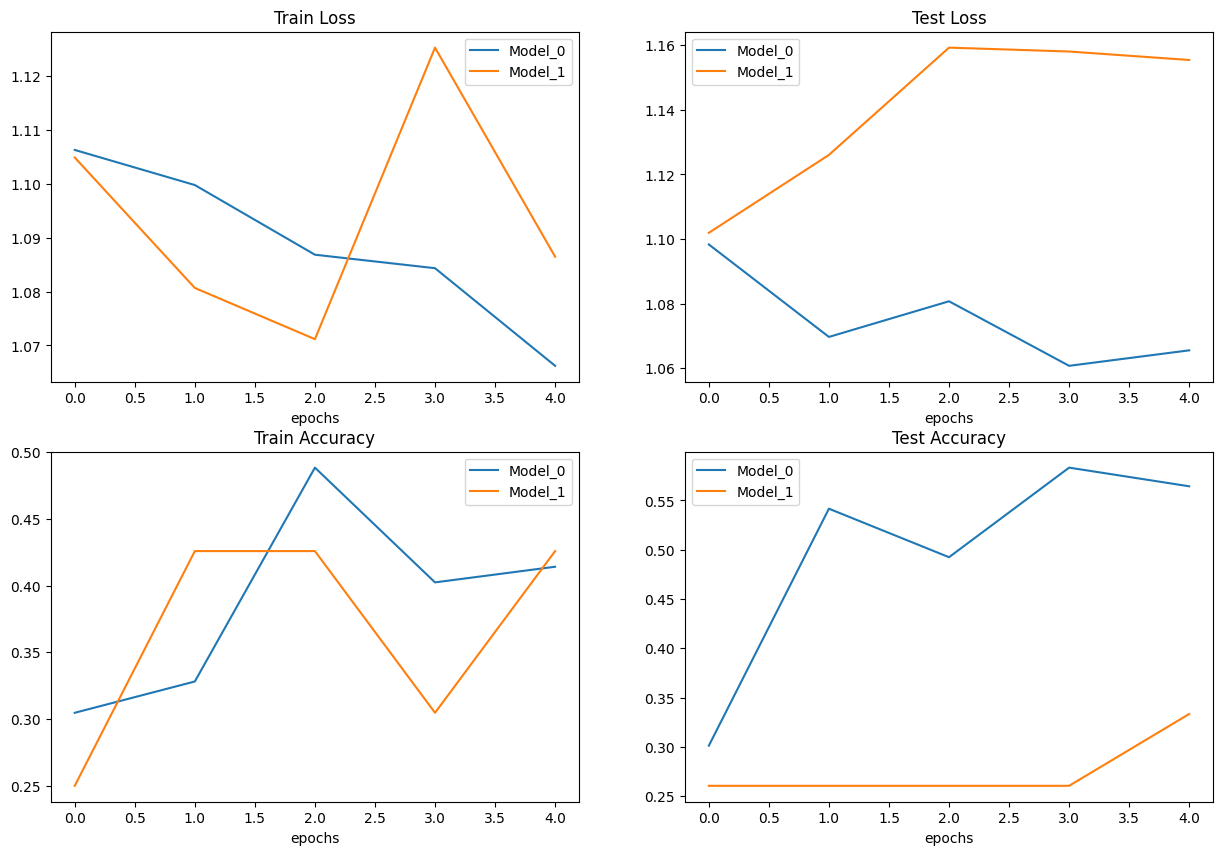

In [75]:
# set up a plot
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))




# plot for the train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df['train_loss'], label='Model_0')
plt.plot(epochs, model_1_df['train_loss'], label='Model_1')
plt.title('Train Loss')
plt.xlabel('epochs')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df['test_loss'], label='Model_0')
plt.plot(epochs, model_1_df['test_loss'], label='Model_1')
plt.title('Test Loss')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df['train_acc'], label='Model_0')
plt.plot(epochs, model_1_df['train_acc'], label='Model_1')
plt.title('Train Accuracy')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df['test_acc'], label='Model_0')
plt.plot(epochs, model_1_df['test_acc'], label='Model_1')
plt.title('Test Accuracy')
plt.xlabel('epochs')
plt.legend()

# Making a prediction on custom image

In [76]:
import requests
custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    with open(custom_image_path, 'wb') as f:
        # when downloading from github we need the 'raw' link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)

else:
    print(f"{custom_image_path} already exists, skipping download...")

data/04-pizza-dad.jpeg already exists, skipping download...


## Loading a custom image with Pytorch
We have to make sure the image is in the same format as the data that the model was trained on.
- tensor form with datatype `torch.float32`
- of shape 64x64x3
- on the right device

In [77]:
import torchvision

# read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

TypeError('Invalid shape (3, 4032, 3024) for image data')


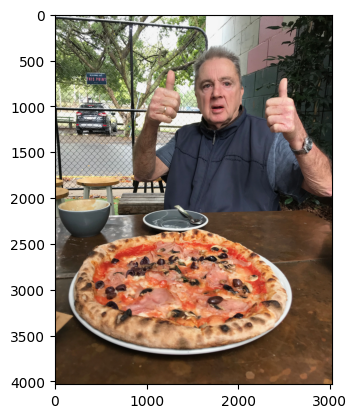

In [78]:
try:
    plt.imshow(custom_image_uint8)
except Exception as e:

    print(e.__repr__())
    custom_image_uint8 = custom_image_uint8.permute(1,2,0)
    plt.imshow(custom_image_uint8)

In [79]:
print("Custom image tensor:\n", custom_image_uint8)
print("Custom image shape:\n", custom_image_uint8.shape)
print("Custom image type:\n", custom_image_uint8.dtype)

Custom image tensor:
 tensor([[[154, 171, 119],
         [173, 190, 138],
         [181, 193, 147],
         ...,
         [ 21,  22,  17],
         [ 18,  19,  14],
         [ 14,  15,  10]],

        [[146, 163, 111],
         [165, 182, 130],
         [181, 193, 145],
         ...,
         [ 21,  22,  17],
         [ 18,  19,  14],
         [ 15,  16,  11]],

        [[124, 141,  87],
         [146, 163, 111],
         [172, 184, 136],
         ...,
         [ 18,  19,  14],
         [ 17,  18,  13],
         [ 15,  16,  11]],

        ...,

        [[ 72,  55,  35],
         [ 59,  42,  22],
         [ 45,  28,   8],
         ...,
         [152, 107,  52],
         [150, 104,  52],
         [148, 103,  48]],

        [[ 64,  47,  27],
         [ 55,  38,  18],
         [ 41,  24,   4],
         ...,
         [150, 108,  50],
         [147, 104,  49],
         [144, 102,  44]],

        [[ 64,  47,  27],
         [ 60,  43,  23],
         [ 46,  29,   9],
         ...,
         [14

## making a prediction on a custom iamge with a trained PyTorch model

In [80]:
# trying to predict on unint8 format
model_1.eval()
with torch.inference_mode():
    try:
        model_1(custom_image_uint8.to(device))
    except Exception as e:
        print(e.__repr__())

RuntimeError('Input type (unsigned char) and bias type (float) should be the same')


In [81]:
# load the image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
model_1.eval()
with torch.inference_mode():
    try:
        model_1(custom_image.to(device))
    except Exception as e:
        print(e.__repr__())
        print(custom_image)

RuntimeError('mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)')
tensor([[[154., 173., 181.,  ...,  21.,  18.,  14.],
         [146., 165., 181.,  ...,  21.,  18.,  15.],
         [124., 146., 172.,  ...,  18.,  17.,  15.],
         ...,
         [ 72.,  59.,  45.,  ..., 152., 150., 148.],
         [ 64.,  55.,  41.,  ..., 150., 147., 144.],
         [ 64.,  60.,  46.,  ..., 149., 146., 143.]],

        [[171., 190., 193.,  ...,  22.,  19.,  15.],
         [163., 182., 193.,  ...,  22.,  19.,  16.],
         [141., 163., 184.,  ...,  19.,  18.,  16.],
         ...,
         [ 55.,  42.,  28.,  ..., 107., 104., 103.],
         [ 47.,  38.,  24.,  ..., 108., 104., 102.],
         [ 47.,  43.,  29.,  ..., 107., 104., 101.]],

        [[119., 138., 147.,  ...,  17.,  14.,  10.],
         [111., 130., 145.,  ...,  17.,  14.,  11.],
         [ 87., 111., 136.,  ...,  14.,  13.,  11.],
         ...,
         [ 35.,  22.,   8.,  ...,  52.,  52.,  48.],
         [ 27.,  18.,   4

In [82]:
# create transform to resize image

from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

# transform target image
custom_image_transformed = custom_image_transform(custom_image)

# print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


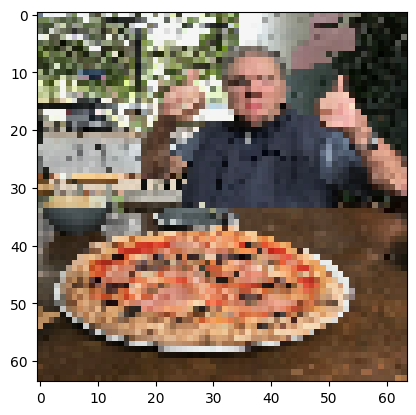

In [83]:
custom_image_transformed = custom_image_transformed/255
plt.imshow(custom_image_transformed.permute(1,2,0))

In [84]:
# making a prediction
model_1.eval()
with torch.inference_mode():
    try:
        custom_image_pred = model_1(custom_image_transformed.to(device))
    except Exception as e:
        print(e.__repr__())

        # adding a batch dimension
        print(custom_image_transformed.shape)
        print(custom_image_transformed.unsqueeze(0).shape)
        custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

RuntimeError('mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)')
torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])


tensor([[ 0.0665,  0.0542, -0.2037]])

In [85]:
class_names

['pizza', 'steak', 'sushi']

To make the prediction, we had to:
1. load the image and turn it into a Tensor
2. make sure the image was the same datatype as the model (torch.float32)
3. make sure the image was the same shape as the model was trained on
4. make sure that the image was on the same device

In [86]:
# convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
# covert the prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs)
custom_image_pred_label

tensor(0)

In [87]:
class_names[custom_image_pred_label]

'pizza'

## building a prediction function:
where we pass an image path and have our model predict on that image
and plot the image + prediction

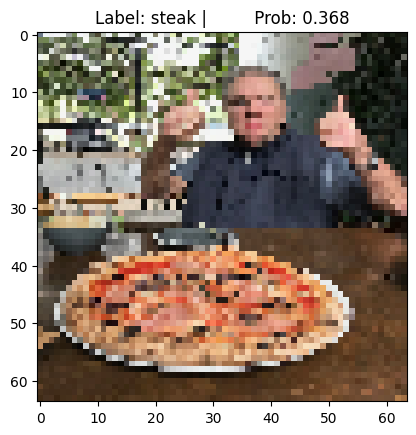

In [88]:
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

# transform target image
custom_image_transformed = custom_image_transform(custom_image)

def model_prediction(model: torch.nn.Module,
                     image_path: str,
                     class_names: List[str] = None,
                     transform=None,
                     device=device):
    # format the path
    image_path = str(data_path / image_path)
    # load the image and convert it to .torch(torch.float) and put on device
    img = torchvision.io.read_image(str(custom_image_path)).type(torch.float32).to(device)
    # resize the image using the transforms function
    img = transform(img)
    # resize the pixels by dividing by 255
    img = img/255
    # plot the image with plt.imgshow() , permute the shape to do so
    plt.imshow(img.permute(1,2,0))
    # batchify the image
    img = img.unsqueeze(0)

    model_1.eval()
    with torch.inference_mode():
        preds_logits = model(img)
        pred_probs = torch.softmax(preds_logits, dim=1)
        pred_label = torch.argmax(pred_probs)
        plt.title(f"Label: {class_names[pred_label]} | \
        Prob: {pred_probs.max().cpu():.3f}") # we need to put it in the cpu for matplotlib


i_path = "04-pizza-dad.jpeg"
model_prediction(model=model_0, image_path=i_path, class_names=class_names, transform=custom_image_transform)